# **RNN Introduction**


## Importing required libraries


In [36]:
import tensorflow_datasets as tfds
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Embedding, SimpleRNN, Dense
from keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer




import keras
import pandas as pd
import numpy as np

from keras import layers
import matplotlib.pyplot as plt
import re
import string
from sklearn.model_selection import train_test_split

## Loading and preprocessing the data
### Dataset 4-Deep learning/5-Time Series Forecasting (RNN)/LAB/ٌDatasets/traffic.csv

In [4]:
traffic = pd.read_csv("traffic.csv")
traffic.head()

,DateTime,Junction,Vehicles,ID
0,2015-11-01 00:00:00,1,15,20151101001
1,2015-11-01 01:00:00,1,13,20151101011
2,2015-11-01 02:00:00,1,10,20151101021
3,2015-11-01 03:00:00,1,7,20151101031
4,2015-11-01 04:00:00,1,9,20151101041


In [17]:
traffic['Junction'].value_counts()

,count
Junction,
1,14592
2,14592
3,14592
4,4344


## Visualization

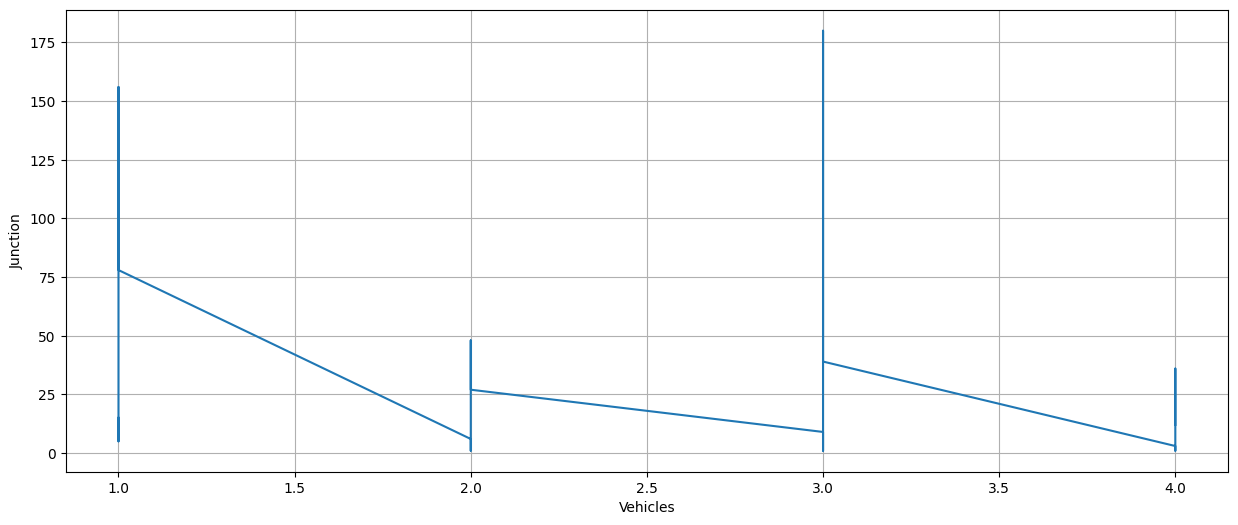

In [11]:
plt.figure(figsize=(15, 6))
plt.plot(traffic['Junction'], traffic['Vehicles'])
plt.xlabel('Vehicles')
plt.ylabel('Junction')

plt.grid(True)
plt.show()


In [12]:
traffic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48120 entries, 0 to 48119
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   DateTime  48120 non-null  object
 1   Junction  48120 non-null  int64 
 2   Vehicles  48120 non-null  int64 
 3   ID        48120 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB


In [16]:
traffic = traffic.drop(columns=['ID'],axis=1)

## Split the data into train and test

In [31]:
X = traffic[['DateTime','Vehicles']]
y = traffic['Junction']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [32]:
print("Train set shape:", X_train.shape)
print("Test set shape:", X_test.shape)

Train set shape: (38496, 2)
Test set shape: (9624, 2)


In [34]:
if isinstance(X_train.iloc[0,0], bytes):
    X_train['DateTime'] = X_train['DateTime'].str.decode('utf-8')
    X_test['DateTime'] = X_test['DateTime'].str.decode('utf-8')

In [38]:
max_features = 10000

tokenizer = Tokenizer(num_words=max_features)

tokenizer.fit_on_texts(X_train)

X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)

In [39]:
max_length = 100

X_train_pad = pad_sequences(X_train_seq, maxlen=max_length)
X_test_pad = pad_sequences(X_test_seq, maxlen=max_length)

## Modeling


In [40]:

model = Sequential()

model.add(Embedding(max_features, 32, input_length=max_length))
model.add(SimpleRNN(32))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])

model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)              │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ simple_rnn_1 (SimpleRNN)             │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [41]:
history = model.fit(X_train_pad, y_train, epochs=10, validation_split=0.2)

Epoch 1/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - acc: 0.0000e+00 - loss: 0.7305 - val_acc: 0.0000e+00 - val_loss: -0.1969
Epoch 2/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 322ms/step - acc: 0.0000e+00 - loss: -0.3314 - val_acc: 0.0000e+00 - val_loss: -0.7141
Epoch 3/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 138ms/step - acc: 0.0000e+00 - loss: -0.8936 - val_acc: 0.0000e+00 - val_loss: -1.2169
Epoch 4/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step - acc: 0.0000e+00 - loss: -1.4301 - val_acc: 0.0000e+00 - val_loss: -1.7923
Epoch 5/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step - acc: 0.0000e+00 - loss: -2.0302 - val_acc: 0.0000e+00 - val_loss: -2.4139
Epoch 6/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step - acc: 0.0000e+00 - loss: -2.6695 - val_acc: 0.0000e+00 - val_loss: -3.0085
Epoch 7/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step - acc: 0.0000e+00 - loss: -3.2784 - val_acc: 0.0000e+00 - val_loss: -3.5410
Epoch 8/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step - acc: 0.0000e+00 - loss: -3.8237 - val_acc: 0.0000e+00 - val_loss: -4.0041

## Visualization of results


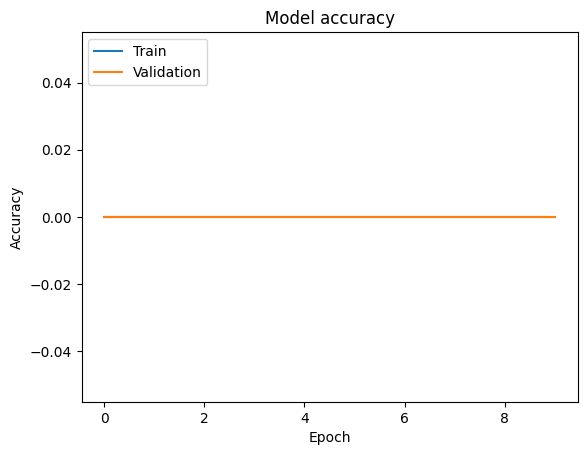

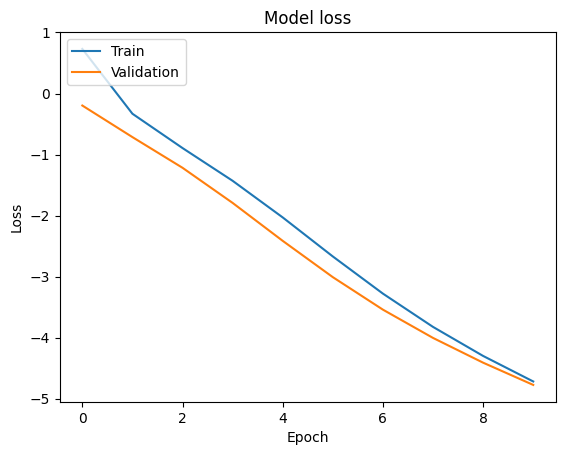

In [42]:

# Plot training & validation accuracy values
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()
